<a href="https://colab.research.google.com/github/LammyG/HDSC-Machine-Learning-Regression-/blob/main/stage_b_quiz_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip install -U openpyxl

In [ ]:
import sklearn as sn
import sklearn.preprocessing as pp
import sklearn.linear_model as Lm
import sklearn.model_selection as Ms
import sklearn.metrics as snms


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')



In [ ]:
size = df.size

In [ ]:
shape = df.shape

In [ ]:
#dataframe.ndim
df_ndim = df.ndim

In [ ]:
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))
  

Size = 572315
Shape =(19735, 29)
Shape[0] x Shape[1] = 572315


In [ ]:
#Rename columns
column_names: {'X1': 'date', 'X2': 'Appliance', 'X3': 'lights', 'X4': 'T1', 'X5': 'RH_1', 'X6': 'T2', 'X7': 'RH_2', 'X8': 'T3', 'X9': 'RH_3', 'X10': 'T4', 'X11': 'RH_4', 'X12': 'T5', 'X13': 'RH_5', 'X14': 'T6', 'X15': 'RH_6', 'X16': 'T7', 'X17': 'RH_7', 'X18': 'T8', 'X19': 'RH_8', 'X20': 'T9', 'X21': 'RH_9', 'X22': 'T_out', 'X23': 'Press_mm_hg', 'X24': 'RH_out', 'X25': 'Windspeed', 'X26': 'Visibility', 'X27': 'Tdewpoint', 'Y1': 'rv1', 'Y2': 'rv2' }


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

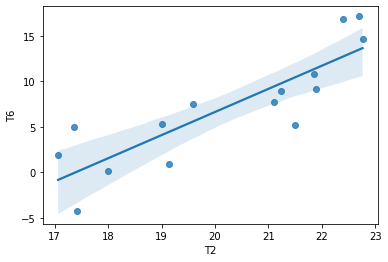

In [ ]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [ ]:
from sklearn.linear_model import LinearRegression
df = df.apply(pd.to_numeric, errors='coerce')
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
#Mean Absolute Error (MAE)
#Firstly we normalize our dataset to a common scale using the min max scaler
import sklearn.preprocessing as pp
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
normalized_df = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns)
features_df = normalized_df.drop(columns=['date', 'lights'])
Appliances_target = normalized_df['Appliances']


In [ ]:
normalized_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.0,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.0,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.0,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.0,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,0.0,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,0.0,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,0.0,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,0.0,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
features_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
#Now we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, Appliances_target, test_size=0.3, random_state=42)

In [ ]:
#initializing the model
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
X1= df[['T2']]
y1=df['T6']


In [ ]:
linear_model.fit(X1, y1)

LinearRegression()

In [ ]:
#QUESTION 12
linear_model.score(X1,y1)

0.6418990830855493

In [ ]:
X2 = df[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
y2 = df['Appliances']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#X2 = X2.values #returns a numpy array
scaler = MinMaxScaler()
X2scal = scaler.fit_transform(X2)
X2scal [0:1]

array([[0.32734952, 0.56618659, 0.22534529, 0.68403787, 0.21518777,
        0.74606637, 0.35135135, 0.76426234, 0.17550565, 0.38169106,
        0.3810702 , 0.84182676, 0.17059378, 0.6534279 , 0.17332926,
        0.66141193, 0.22303156, 0.67729029, 0.37299035, 0.09767442,
        0.89473684, 0.5       , 0.95384615, 0.53846154, 0.26544891,
        0.26544891]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X2scal,y1, test_size=0.3, random_state=42)

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#obtain predictions
y_pred = linear_model.predict(x_test)

In [ ]:
y_pred[0:3]

array([ 1.19857143,  2.53      , -0.26666667])

In [ ]:
#QUESTION 13
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

6.531594543124107e-14

In [ ]:
#RMSE(Root mean squared error)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 2)
print(rmse)

6.554152758081693e-14


In [ ]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 2)
print(r2_score)

1.0


In [ ]:
#RSS (Residual sum of squares)
import numpy as np
rss = np.sum(np.square(y_test - y_pred))
print(round(rss, 2))
print(rss)

0.0
2.5434791370589384e-23


In [ ]:
#the coefficient we intended regularizing
linear_model.coef_

array([ 9.56800725e-15, -8.88178420e-16,  2.18981818e-14,  3.61041868e-15,
       -2.31479878e-15, -1.08408792e-14, -1.00967101e-14,  2.25355830e-15,
       -4.65321011e-15, -1.22528074e-15,  3.43550000e+01, -4.88996025e-15,
       -2.32583740e-15, -4.43179399e-16, -1.67576405e-15,  4.22305738e-15,
       -3.27148788e-15,  4.82947016e-15,  1.62092562e-14, -1.80411242e-14,
        6.66133815e-15,  6.74460487e-15, -1.60704783e-14, -1.50990331e-14,
       -2.82066037e-15,  1.78676518e-15])

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
#feature selection and lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#comparing the effect of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['features', col_name]
  weights_df[col_name].round(3)
  return weights_df

  linear_model_weights = get_weights_df(model, x_train, 'linear_model_weights')
  ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_weight')
  lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

  final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
  final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


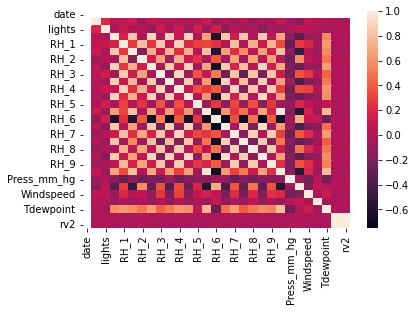

In [ ]:
sns.heatmap(df.corr())